# ERA - Interim Forecast

## Configuration

In [1]:
INPUT_FILE_AN = 'csvs/database_era5.csv'
INPUT_FILE_FC = 'csvs/database_era5_forecast.csv'
HOPT_ELM_EXP = 'era5_elm_1l_cv'
HOPT_SVM_EXP = 'era5_svm_cv'

In [2]:
from lib.helpers import *
from lib.plots import *
from IPython.display import set_matplotlib_formats
from IPython.core.display import clear_output

%matplotlib inline
%load_ext autoreload
%autoreload 2
set_matplotlib_formats('retina', 'png', 'pdf')

## Read data

### Analysis

In [3]:
import pandas as pd

an = pd.read_csv(INPUT_FILE_AN, na_values=['#NAME?'])

In [4]:
len(an)

6358

In [5]:
an.head(5)

,timestamp,power,800_potential_vorticity,800_specific_rain_water_content,800_specific_snow_water_content,800_geopotential,800_temperature,800_specific_humidity,800_vertical_velocity,800_vorticity_(relative),...,instantaneous_surface_sensible_heat_flux,instantaneous_moisture_flux,skin_temperature,soil_temperature_level_4,temperature_of_snow_layer,forecast_albedo,forecast_surface_roughness,forecast_logarithm_of_surface_roughness_for_heat,100_metre_u_wind_component,100_metre_v_wind_component
0,1.199142e+09,5.062358,1.030059e-06,0.000000,0.000000,19881.312012,276.498428,0.001768,0.177553,0.000021,...,2.742894,1.471184e-06,271.605400,284.490997,273.118116,0.127404,0.327620,-6.455932,-0.493846,1.975267
1,1.199164e+09,15.854582,8.788981e-07,0.000000,0.000000,19702.475098,276.324902,0.001287,0.147644,0.000023,...,-8.456777,9.724127e-07,274.449509,284.463531,272.075150,0.127404,0.330838,-6.376909,-1.009596,1.292644
2,1.199185e+09,5.186692,7.864253e-07,0.000000,0.000000,19605.051758,275.381569,0.001015,0.102353,0.000028,...,-52.268616,-9.115076e-06,279.848511,284.436920,270.824219,0.127445,0.330481,-6.386376,-0.796404,2.400782
3,1.199207e+09,24.205508,6.412278e-07,0.000000,0.000000,19385.869141,274.225632,0.003413,0.232089,-0.000006,...,-0.214573,-6.679866e-07,277.102051,284.409332,273.160645,0.127445,0.328211,-6.441814,-2.339380,3.527163
4,1.199228e+09,27.907537,5.055861e-07,0.000043,0.000012,19109.912109,274.462891,0.005352,-1.136514,0.000118,...,10.244557,-2.524515e-06,278.108276,284.382568,273.160400,0.128137,0.360989,-5.764565,-4.049392,7.589182


### Forecast

In [6]:
fc = pd.read_csv(INPUT_FILE_FC, na_values=['#NAME?'])

In [7]:
len(fc)

3176

In [8]:
fc.head(5)

,timestamp,power,800_potential_vorticity,800_specific_rain_water_content,800_specific_snow_water_content,800_geopotential,800_temperature,800_specific_humidity,800_vertical_velocity,800_vorticity_relative_,...,large_scale_snowfall,forecast_albedo,forecast_surface_roughness,forecast_logarithm_of_surface_roughness_for_heat,100_metre_u_wind_component,100_metre_v_wind_component,potential_evaporation,precipitation_type,k_index,total_totals_index
0,1.199250e+09,2.637331,5.485395e-07,4.309299e-08,0.000024,18803.625977,273.140930,0.003933,-1.289132,0.000102,...,0.0,0.127477,0.361027,-5.764172,-0.585299,3.978149,6.899104e-06,0.0,-6.444284,35.941246
1,1.199293e+09,7.538979,3.993577e-07,0.000000e+00,0.000005,18707.807617,272.368656,0.004136,-0.257056,0.000002,...,0.0,0.127516,0.358626,-5.808570,4.075981,5.037252,3.274091e-06,1.0,17.283958,45.047573
2,1.199336e+09,14.817786,8.249491e-07,0.000000e+00,0.000023,17507.499023,272.360077,0.003621,-0.325269,0.000134,...,0.0,0.127545,0.360768,-5.770655,8.964499,3.906379,1.114151e-06,1.0,6.726238,37.589916
3,1.199380e+09,0.000000,4.471697e-07,0.000000e+00,0.000007,17683.211914,270.814634,0.003038,0.224820,0.000045,...,0.0,0.127589,0.336023,-6.269248,3.811053,3.642288,-2.409462e-06,1.0,17.761238,51.630409
4,1.199423e+09,25.214085,4.873479e-07,0.000000e+00,0.000000,18266.816895,271.534317,0.002283,0.552858,0.000003,...,0.0,0.127622,0.345316,-6.075482,0.023023,-1.757421,-7.246945e-07,1.0,14.494644,52.129944


### Feature intersection

In [9]:
columns = an.columns.intersection(fc.columns)
columns_removed = an.columns ^ fc.columns

an = an[columns]
fc = fc[columns]

columns_removed

Index(['10_metre_wind_gust_since_previous_post_processing',
       '800_vorticity_(relative)', '800_vorticity_relative_',
       '825_vorticity_(relative)', '825_vorticity_relative_',
       '850_vorticity_(relative)', '850_vorticity_relative_',
       '875_vorticity_(relative)', '875_vorticity_relative_',
       '900_vorticity_(relative)',
       ...
       'total_precipitation', 'total_sky_direct_solar_radiation_at_surface',
       'total_totals_index', 'trapping_layer_base_height',
       'trapping_layer_top_height', 'type_of_high_vegetation',
       'type_of_low_vegetation', 'vertical_integral_of_mass_tendency',
       'vertically_integrated_moisture_divergence', 'zero_degree_level'],
      dtype='object', length=127)

### Date conversion

In [10]:
def to_datetime(row):
    row = pd.to_datetime(row, unit='s')
    row = row.dt.tz_localize('UTC').dt.tz_convert('Europe/Brussels')
    row = row.apply(lambda x: x.strftime('%d/%m/%Y %H:%M:%S'))
    
    return row

an['timestamp'] = to_datetime(an['timestamp'])
fc['timestamp'] = to_datetime(fc['timestamp'])

In [26]:
an.head(10)

,timestamp,power,800_potential_vorticity,800_specific_rain_water_content,800_specific_snow_water_content,800_geopotential,800_temperature,800_specific_humidity,800_vertical_velocity,800_divergence,...,instantaneous_surface_sensible_heat_flux,instantaneous_moisture_flux,skin_temperature,soil_temperature_level_4,temperature_of_snow_layer,forecast_albedo,forecast_surface_roughness,forecast_logarithm_of_surface_roughness_for_heat,100_metre_u_wind_component,100_metre_v_wind_component
0,01/01/2008 00:00:00,5.062358,1.030059e-06,0.000000e+00,0.000000,19881.312012,276.498428,0.001768,0.177553,0.000009,...,2.742894,1.471184e-06,271.605400,284.490997,273.118116,0.127404,0.327620,-6.455932,-0.493846,1.975267
1,01/01/2008 06:00:00,15.854582,8.788981e-07,0.000000e+00,0.000000,19702.475098,276.324902,0.001287,0.147644,-0.000007,...,-8.456777,9.724127e-07,274.449509,284.463531,272.075150,0.127404,0.330838,-6.376909,-1.009596,1.292644
2,01/01/2008 12:00:00,5.186692,7.864253e-07,0.000000e+00,0.000000,19605.051758,275.381569,0.001015,0.102353,-0.000001,...,-52.268616,-9.115076e-06,279.848511,284.436920,270.824219,0.127445,0.330481,-6.386376,-0.796404,2.400782
3,01/01/2008 18:00:00,24.205508,6.412278e-07,0.000000e+00,0.000000,19385.869141,274.225632,0.003413,0.232089,0.000028,...,-0.214573,-6.679866e-07,277.102051,284.409332,273.160645,0.127445,0.328211,-6.441814,-2.339380,3.527163
4,02/01/2008 00:00:00,27.907537,5.055861e-07,4.252606e-05,0.000012,19109.912109,274.462891,0.005352,-1.136514,0.000046,...,10.244557,-2.524515e-06,278.108276,284.382568,273.160400,0.128137,0.360989,-5.764565,-4.049392,7.589182
5,02/01/2008 06:00:00,2.637331,4.983064e-07,6.212266e-08,0.000029,18763.629883,273.027657,0.004035,-1.014009,0.000028,...,-4.808495,3.886167e-06,278.560104,284.355957,273.160889,0.128277,0.360981,-5.764640,-0.622602,4.211207
6,02/01/2008 12:00:00,2.571419,4.217720e-07,0.000000e+00,0.000006,18744.069336,272.245277,0.002836,-0.478151,-0.000036,...,-31.403366,-1.457137e-05,281.810303,284.329102,273.155146,0.127516,0.360603,-5.773415,4.574441,4.952589
7,02/01/2008 18:00:00,7.538979,4.159962e-07,0.000000e+00,0.000006,18651.150391,272.462196,0.004096,-0.350008,-0.000015,...,12.178575,-7.074104e-07,278.500992,284.303131,273.159912,0.127516,0.354973,-5.877678,4.027729,4.887608
8,03/01/2008 00:00:00,27.974593,3.276049e-07,1.340365e-06,0.000065,18220.218750,272.866882,0.004661,-1.111857,0.000083,...,-9.099198,4.630365e-06,279.392792,284.276184,273.160156,0.127545,0.361023,-5.764119,0.892548,10.049099
9,03/01/2008 06:00:00,14.817786,7.126453e-07,0.000000e+00,0.000028,17495.375000,272.067886,0.003953,-0.119699,-0.000028,...,36.175323,-7.738893e-06,278.385925,284.252106,273.161133,0.127545,0.360970,-5.765900,8.218662,4.292583


In [12]:
fc.head(5)

,timestamp,power,800_potential_vorticity,800_specific_rain_water_content,800_specific_snow_water_content,800_geopotential,800_temperature,800_specific_humidity,800_vertical_velocity,800_divergence,...,instantaneous_surface_sensible_heat_flux,instantaneous_moisture_flux,skin_temperature,soil_temperature_level_4,temperature_of_snow_layer,forecast_albedo,forecast_surface_roughness,forecast_logarithm_of_surface_roughness_for_heat,100_metre_u_wind_component,100_metre_v_wind_component
0,02/01/2008 06:00:00,2.637331,5.485395e-07,4.309299e-08,0.000024,18803.625977,273.140930,0.003933,-1.289132,0.000021,...,-2.968686,3.309365e-06,278.320160,284.355957,273.159668,0.127477,0.361027,-5.764172,-0.585299,3.978149
1,02/01/2008 18:00:00,7.538979,3.993577e-07,0.000000e+00,0.000005,18707.807617,272.368656,0.004136,-0.257056,-0.000039,...,16.819290,2.469396e-07,278.732559,284.303162,273.159912,0.127516,0.358626,-5.808570,4.075981,5.037252
2,03/01/2008 06:00:00,14.817786,8.249491e-07,0.000000e+00,0.000023,17507.499023,272.360077,0.003621,-0.325269,-0.000088,...,30.630742,-6.510238e-06,278.628540,284.252106,273.159668,0.127545,0.360768,-5.770655,8.964499,3.906379
3,03/01/2008 18:00:00,0.000000,4.471697e-07,0.000000e+00,0.000007,17683.211914,270.814634,0.003038,0.224820,0.000012,...,10.002852,-1.245752e-06,277.000519,284.202545,273.160461,0.127589,0.336023,-6.269248,3.811053,3.642288
4,04/01/2008 06:00:00,25.214085,4.873479e-07,0.000000e+00,0.000000,18266.816895,271.534317,0.002283,0.552858,-0.000045,...,1.029001,-4.515037e-08,276.390610,284.154388,273.160156,0.127622,0.345316,-6.075482,0.023023,-1.757421


## Data Preparation

In [13]:
y_train = an.power
X_train = an.drop(['timestamp', 'power'], 1)
y_test = fc.power
X_test = fc.drop(['timestamp', 'power'], 1)

In [14]:
y_train.head(5)

0     5.062358
1    15.854582
2     5.186692
3    24.205508
4    27.907537
Name: power, dtype: float64

In [15]:
X_train.head(5)

,800_potential_vorticity,800_specific_rain_water_content,800_specific_snow_water_content,800_geopotential,800_temperature,800_specific_humidity,800_vertical_velocity,800_divergence,800_u_component_of_wind,800_v_component_of_wind,...,instantaneous_surface_sensible_heat_flux,instantaneous_moisture_flux,skin_temperature,soil_temperature_level_4,temperature_of_snow_layer,forecast_albedo,forecast_surface_roughness,forecast_logarithm_of_surface_roughness_for_heat,100_metre_u_wind_component,100_metre_v_wind_component
0,1.030059e-06,0.000000,0.000000,19881.312012,276.498428,0.001768,0.177553,0.000009,2.214015,2.937463,...,2.742894,1.471184e-06,271.605400,284.490997,273.118116,0.127404,0.327620,-6.455932,-0.493846,1.975267
1,8.788981e-07,0.000000,0.000000,19702.475098,276.324902,0.001287,0.147644,-0.000007,5.483051,2.211277,...,-8.456777,9.724127e-07,274.449509,284.463531,272.075150,0.127404,0.330838,-6.376909,-1.009596,1.292644
2,7.864253e-07,0.000000,0.000000,19605.051758,275.381569,0.001015,0.102353,-0.000001,7.007135,5.166644,...,-52.268616,-9.115076e-06,279.848511,284.436920,270.824219,0.127445,0.330481,-6.386376,-0.796404,2.400782
3,6.412278e-07,0.000000,0.000000,19385.869141,274.225632,0.003413,0.232089,0.000028,8.641260,5.762604,...,-0.214573,-6.679866e-07,277.102051,284.409332,273.160645,0.127445,0.328211,-6.441814,-2.339380,3.527163
4,5.055861e-07,0.000043,0.000012,19109.912109,274.462891,0.005352,-1.136514,0.000046,12.993994,18.317413,...,10.244557,-2.524515e-06,278.108276,284.382568,273.160400,0.128137,0.360989,-5.764565,-4.049392,7.589182


In [16]:
y_test.head(5)

0     2.637331
1     7.538979
2    14.817786
3     0.000000
4    25.214085
Name: power, dtype: float64

In [17]:
X_test.head(5)

,800_potential_vorticity,800_specific_rain_water_content,800_specific_snow_water_content,800_geopotential,800_temperature,800_specific_humidity,800_vertical_velocity,800_divergence,800_u_component_of_wind,800_v_component_of_wind,...,instantaneous_surface_sensible_heat_flux,instantaneous_moisture_flux,skin_temperature,soil_temperature_level_4,temperature_of_snow_layer,forecast_albedo,forecast_surface_roughness,forecast_logarithm_of_surface_roughness_for_heat,100_metre_u_wind_component,100_metre_v_wind_component
0,5.485395e-07,4.309299e-08,0.000024,18803.625977,273.140930,0.003933,-1.289132,0.000021,10.513603,7.261340,...,-2.968686,3.309365e-06,278.320160,284.355957,273.159668,0.127477,0.361027,-5.764172,-0.585299,3.978149
1,3.993577e-07,0.000000e+00,0.000005,18707.807617,272.368656,0.004136,-0.257056,-0.000039,15.431399,3.123757,...,16.819290,2.469396e-07,278.732559,284.303162,273.159912,0.127516,0.358626,-5.808570,4.075981,5.037252
2,8.249491e-07,0.000000e+00,0.000023,17507.499023,272.360077,0.003621,-0.325269,-0.000088,19.348312,0.464332,...,30.630742,-6.510238e-06,278.628540,284.252106,273.159668,0.127545,0.360768,-5.770655,8.964499,3.906379
3,4.471697e-07,0.000000e+00,0.000007,17683.211914,270.814634,0.003038,0.224820,0.000012,11.158874,-0.111379,...,10.002852,-1.245752e-06,277.000519,284.202545,273.160461,0.127589,0.336023,-6.269248,3.811053,3.642288
4,4.873479e-07,0.000000e+00,0.000000,18266.816895,271.534317,0.002283,0.552858,-0.000045,1.584352,-8.395507,...,1.029001,-4.515037e-08,276.390610,284.154388,273.160156,0.127622,0.345316,-6.075482,0.023023,-1.757421


## Feature Engineering

### Remove constant features

In [18]:
columns_removed = get_constants(X_train).union(get_constants(X_test))
columns_removed

Index(['geopotential', 'ice_temperature_layer_4', 'lake_cover', 'lake_depth',
       'land_sea_mask', 'sea_ice_cover', 'sea_surface_temperature'],
      dtype='object')

In [19]:
X_train = X_train.drop(columns_removed, 1)
X_test = X_test.drop(columns_removed, 1)

In [20]:
len(X_train.columns)

201

In [21]:
len(X_test.columns)

201

## Feature selection and model building

In [22]:
print('Train: {}'.format(X_train.shape))
print('Test: {}'.format(X_test.shape))

Train: (6358, 201)
Test: (3176, 201)


### Shuffle train data

In [23]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=0)

### Feature selection

In [27]:
from sklearn.feature_selection import mutual_info_regression

feature_scores = get_feature_values(X_train, y_train)
pd.Series(feature_scores, index=X_train.columns).sort_values(ascending=False).head(20)

875_v_component_of_wind                             0.575446
850_v_component_of_wind                             0.508245
900_v_component_of_wind                             0.477414
825_v_component_of_wind                             0.404456
instantaneous_northward_turbulent_surface_stress    0.365138
800_v_component_of_wind                             0.322959
100_metre_v_wind_component                          0.306025
925_v_component_of_wind                             0.304755
875_vertical_velocity                               0.245774
900_vertical_velocity                               0.243615
10_metre_v_wind_component                           0.235938
vertical_integral_of_northward_water_vapour_flux    0.235682
neutral_wind_at_10_m_v_component                    0.222875
850_vertical_velocity                               0.219250
925_vertical_velocity                               0.215745
950_v_component_of_wind                             0.204564
825_vertical_velocity   

In [28]:
len(feature_scores)

201

## Parameter exploration

In [29]:
from datetime import datetime
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics.scorer import make_scorer

cv = ShuffleSplit(n_splits=6)
scoring = {
    'ev': make_scorer(explained_variance_score),
    'r2': make_scorer(r2_score),
    'rmse': make_scorer(rmse_score, greater_is_better=False),
}
models = {}

### Find hyperparameters

In [30]:
from hyperopt.mongoexp import MongoTrials

#### ELM

In [31]:
trials = MongoTrials('mongo://localhost:27017/hyperopt/jobs', exp_key=HOPT_ELM_EXP)

display(len(trials.results))
display(pd.DataFrame(trials.results).sort_values(by='loss').head(5))

1000

,loss,loss_ev,loss_r2,loss_variance,ridge__alpha,rl__alpha,rl__n_hidden,rl__rbf_width,selector__k,status,time
389,4.955040,0.769982,0.769853,0.042548,0.000005,0.332327,5416.0,1.183172,27.0,ok,68.352621
801,4.961459,0.769364,0.769249,0.042685,0.000001,0.421522,3772.0,3.058306,27.0,ok,26.379920
289,4.964880,0.768928,0.768782,0.055390,0.000001,0.977410,8292.0,63.788394,30.0,ok,137.812891
797,4.973091,0.768318,0.768144,0.045008,0.000001,0.338790,6019.0,1.767654,30.0,ok,54.115350
937,4.975121,0.768170,0.768079,0.033729,0.000005,0.206642,3541.0,2.456954,27.0,ok,25.961643


In [32]:
best = get_best_trial(trials.results)
display(pd.DataFrame([best]))
models['elm'] = build_elm(
    X_train, y_train, 
    selector__k=int(best['selector__k']),
    rl__n_hidden=int(best['rl__n_hidden']),
    rl__alpha=best['rl__alpha'],
    rl__rbf_width=best['rl__rbf_width'],
    ridge__alpha=best['ridge__alpha'],
)

,loss,loss_ev,loss_r2,loss_variance,ridge__alpha,rl__alpha,rl__n_hidden,rl__rbf_width,selector__k,status,time
937,4.975121,0.76817,0.768079,0.033729,0.000005,0.206642,3541.0,2.456954,27.0,ok,25.961643


#### SVM

In [33]:
trials = MongoTrials('mongo://localhost:27017/hyperopt/jobs', exp_key=HOPT_SVM_EXP)

display(len(trials.results))
display(pd.DataFrame(trials.results).sort_values(by='loss').head(5))

999

,loss,loss_ev,loss_r2,loss_variance,selector__k,status,svm__C,svm__epsilon,svm__gamma,time
797,4.856196,0.779535,0.779088,0.027680,83,ok,14.774547,0.985715,0.019346,15.164382
608,4.865201,0.778856,0.778199,0.033158,81,ok,21.679158,0.444480,0.015004,20.035514
405,4.865244,0.778843,0.778248,0.029248,82,ok,13.586378,0.554093,0.017878,16.705396
789,4.869594,0.778403,0.777883,0.027133,84,ok,16.386082,0.488098,0.019699,19.283910
591,4.869611,0.778426,0.777831,0.031099,77,ok,12.870291,0.473791,0.021431,16.835191


In [34]:
best = get_best_trial(trials.results)
display(pd.DataFrame([best]))
models['svm'] = build_svm(
    X_train, y_train, 
    selector__k=int(best['selector__k']),
    svm__C=best['svm__C'],
    svm__epsilon=best['svm__epsilon'],
    svm__gamma=best['svm__gamma']
)

,loss,loss_ev,loss_r2,loss_variance,selector__k,status,svm__C,svm__epsilon,svm__gamma,time
797,4.856196,0.779535,0.779088,0.02768,83,ok,14.774547,0.985715,0.019346,15.164382


## Validations

In [35]:
from sklearn.base import clone

### ELM

In [36]:
model = clone(models['elm'])
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_test), index=y_test.index, name='{} prediction'.format(y_test.name))

get_scores([
    pd.Series([y_train, model.predict(X_train)], name='Training'),
    pd.Series([y_test, y_pred], name='Testing'),
])

,EV,R2,RMSE
Training,0.770508,0.770508,4.979923
Testing,0.742948,0.742849,5.311206


#### Histogram compare

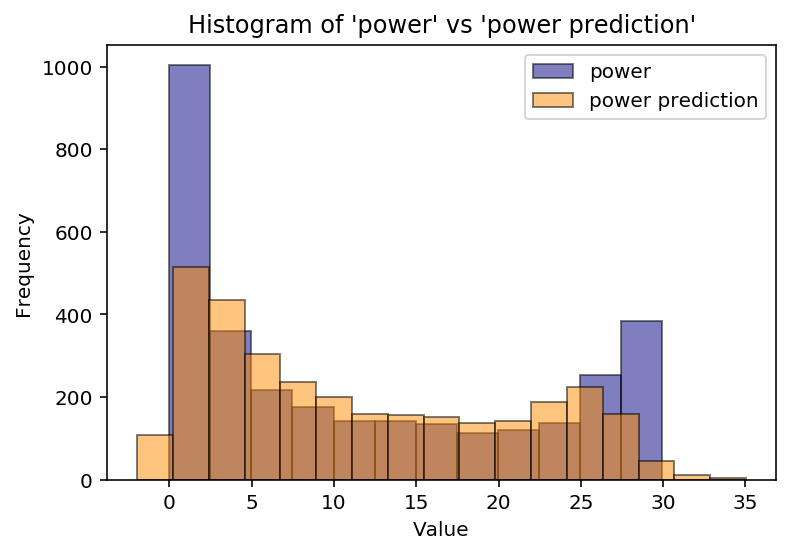

In [37]:
plot_histogram_compare(y_test, y_pred)

#### Scatter compare

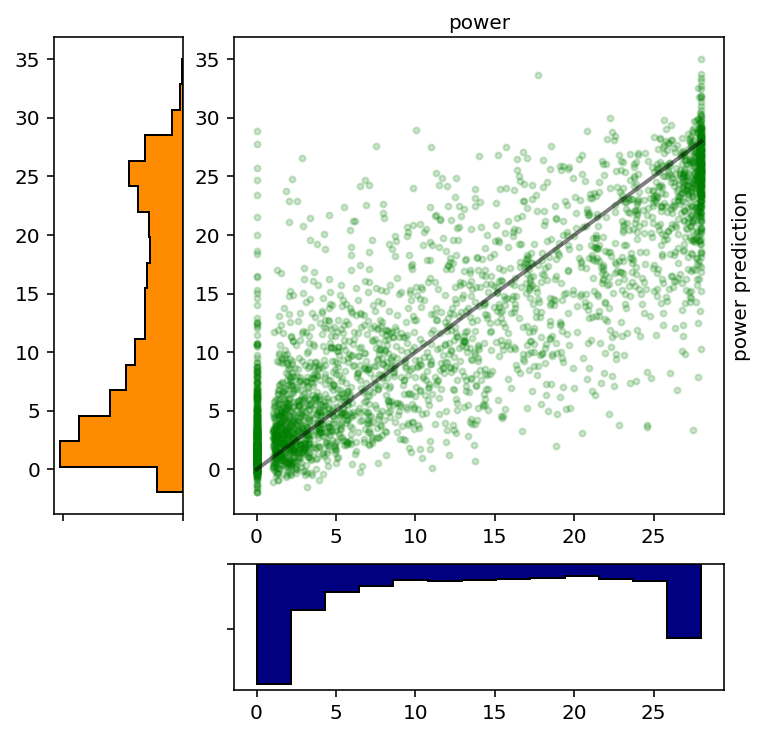

In [38]:
plot_scatter_histogram(y_test, y_pred)

#### Accuracy histogram

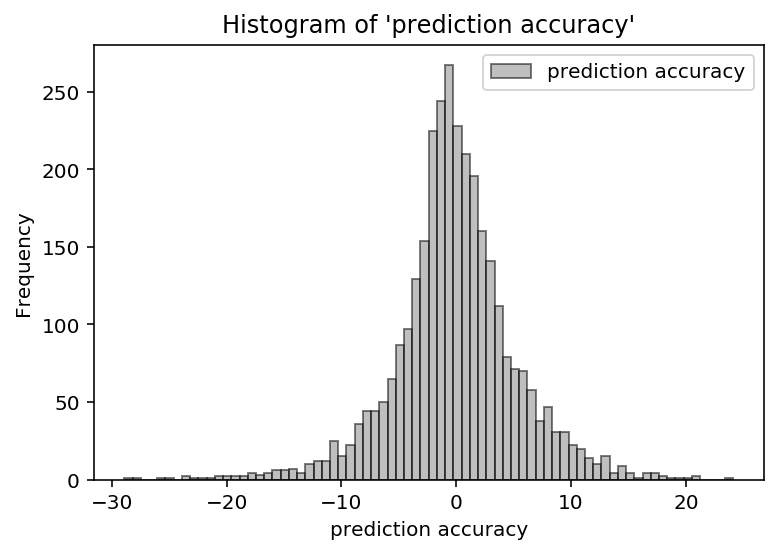

In [39]:
y_accuracy = pd.Series(y_test - y_pred, name='prediction accuracy')

plot_histogram(y_accuracy)

### SVM

In [40]:
model = clone(models['svm'])
model.fit(X_train, y_train)

y_pred = pd.Series(model.predict(X_test), index=y_test.index, name='{} prediction'.format(y_test.name))

get_scores([
    pd.Series([y_train, model.predict(X_train)], name='Training'),
    pd.Series([y_test, y_pred], name='Testing'),
])

,EV,R2,RMSE
Training,0.872345,0.872226,3.715865
Testing,0.825140,0.824599,4.386463


#### Histogram compare

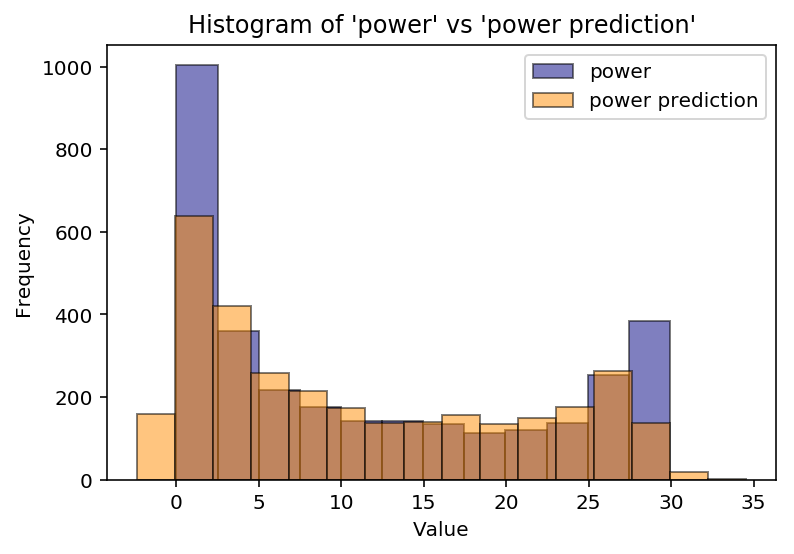

In [41]:
plot_histogram_compare(y_test, y_pred)

#### Scatter compare

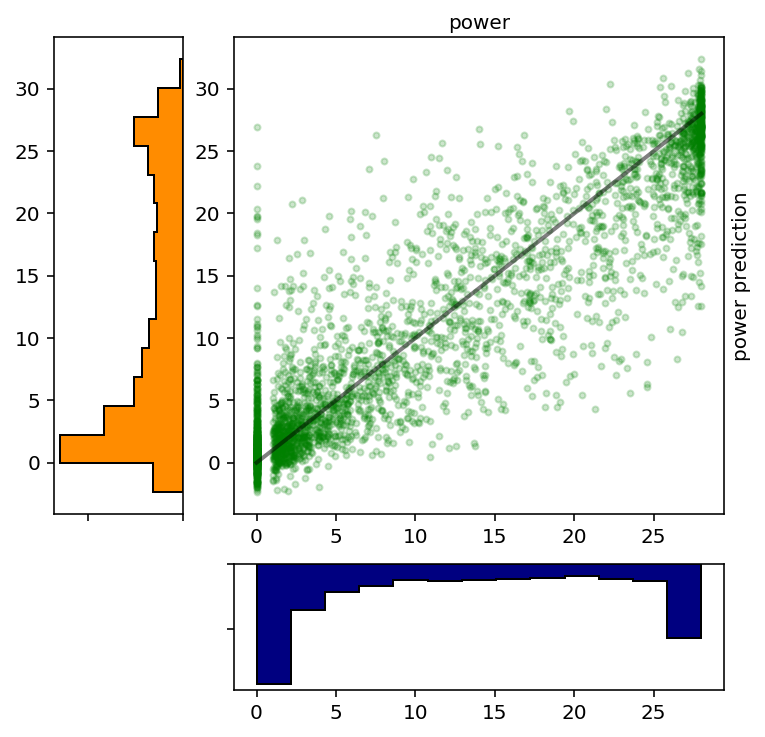

In [42]:
plot_scatter_histogram(y_test, y_pred)

#### Accuracy histogram

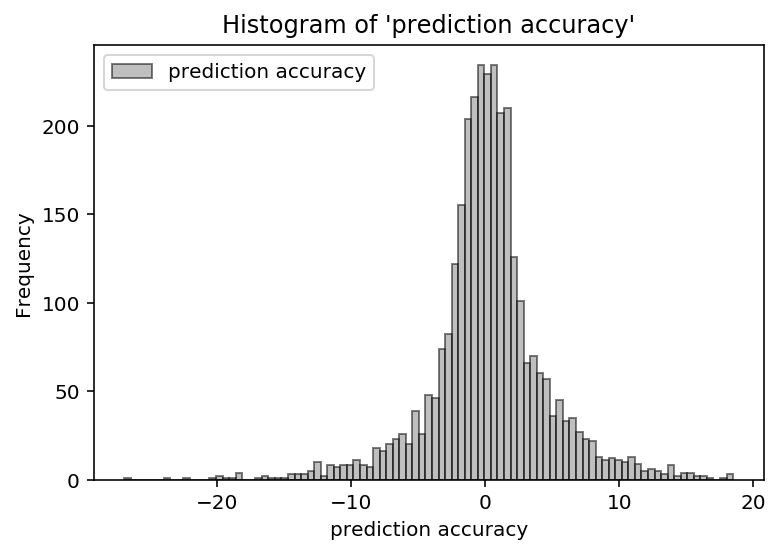

In [43]:
y_accuracy = pd.Series(y_test - y_pred, name='prediction accuracy')

plot_histogram(y_accuracy)